In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [ ]:
for i in range(5):
  sample = np.random.choice(scores, 20)
  print('{}번째 무작위 추출 얻은 표본평균: {}'.format(i+1, sample.mean()))

1번째 무작위 추출 얻은 표본평균: 70.9
2번째 무작위 추출 얻은 표본평균: 68.3
3번째 무작위 추출 얻은 표본평균: 68.65
4번째 무작위 추출 얻은 표본평균: 69.0
5번째 무작위 추출 얻은 표본평균: 70.75


In [ ]:
# 모집단의 평균
scores.mean()

69.53

In [ ]:
# 확률분포
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [ ]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 3, 6, 4, 6, 6, 6, 2, 2, 3, 6, 3, 4, 5, 6, 5, 5, 5, 6, 2, 4, 6,
       6, 5, 5, 6, 3, 5, 6, 6, 6, 5, 6, 6, 5, 5, 2, 3, 2, 4, 6, 4, 5, 3,
       5, 5, 4, 5, 2, 4, 6, 4, 3, 5, 3, 2, 6, 4, 1, 4, 5, 4, 4, 6, 6, 2,
       2, 6, 5, 5, 6, 6, 2, 6, 3, 4, 5, 5, 5, 4, 6, 2, 2, 6, 3, 4, 4, 5,
       5, 4, 6, 3, 5, 6, 3, 5, 4, 6, 6, 5])

In [ ]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq/num_trial},
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,1,0.01
2,12,0.12
3,12,0.12
4,18,0.18
5,27,0.27
6,30,0.30


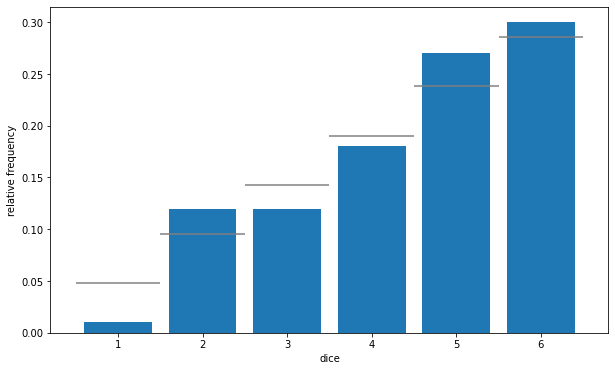

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

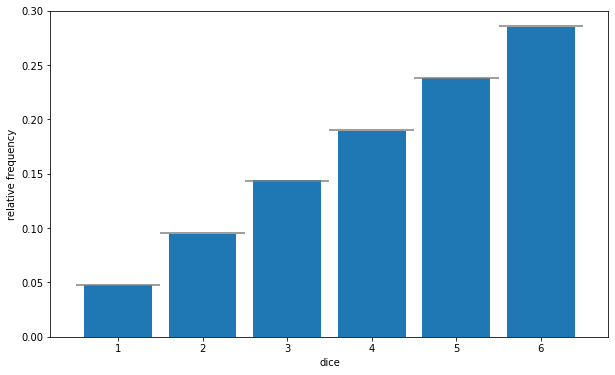

In [ ]:
num_trial = 100000
sample = np.random.choice( dice, num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 추론통계

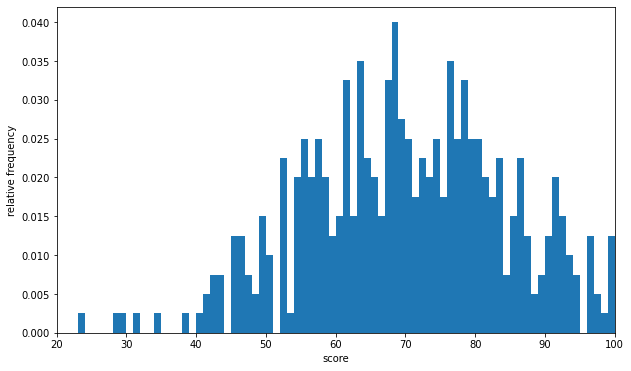

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

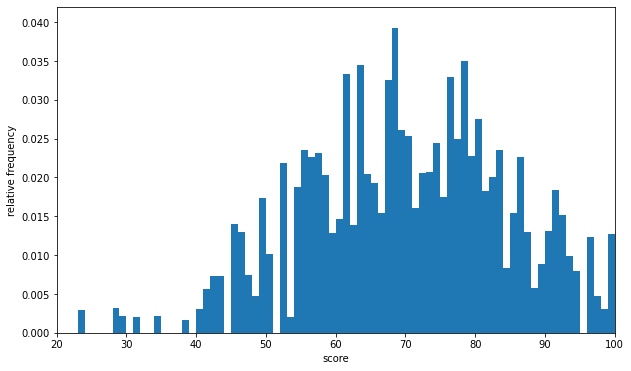

In [ ]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

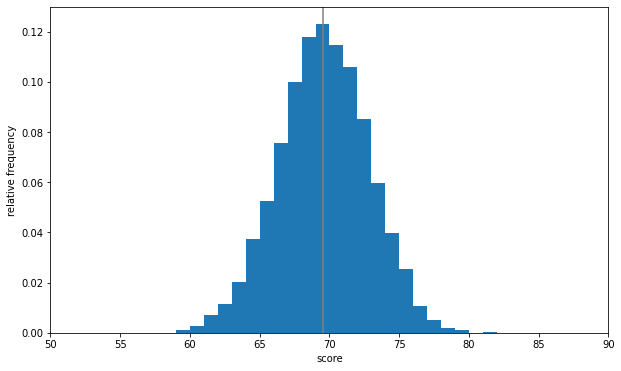

In [ ]:
# 표본평균 분포

sample_means = []
for _ in range(10000):
  sample_means.append( np.random.choice(scores, 20).mean() )

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
np.mean(scores)

69.53

## 확률변수와 확률분포

In [ ]:
from scipy.stats import bernoulli, binom, poisson

In [ ]:
rv = bernoulli(1/6)

In [ ]:
x = [0, 1]
rv.pmf(x)

array([0.83333333, 0.16666667])

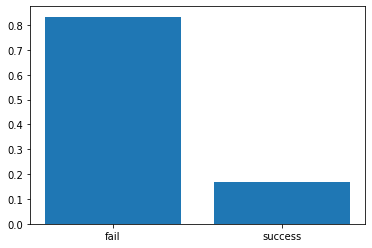

In [ ]:
plt.bar(x, rv.pmf(x))
plt.xticks([0,1], ['fail','success'])
plt.show()

In [ ]:
count = 10000
x = rv.rvs( count)
x

array([1, 0, 0, ..., 0, 1, 0])

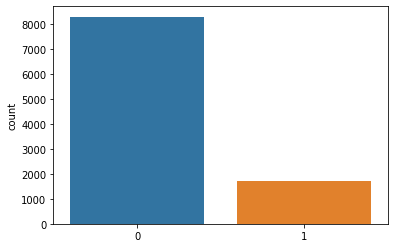

In [ ]:
sns.countplot(x)
plt.show()

In [ ]:
np.bincount(x) / count

array([0.828, 0.172])

In [ ]:
# 이항분포 시행횟수가 1이면 베르누이 분포와 같음
binom(1, 1/6).pmf([0, 1])

array([0.83333333, 0.16666667])

In [ ]:
rv = binom(10, 1/6)

In [ ]:
x = np.arange(11)
rv.pmf(x)

array([1.61505583e-01, 3.23011166e-01, 2.90710049e-01, 1.55045360e-01,
       5.42658759e-02, 1.30238102e-02, 2.17063503e-03, 2.48072575e-04,
       1.86054431e-05, 8.26908584e-07, 1.65381717e-08])

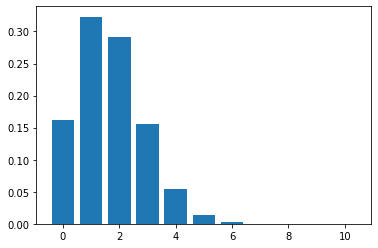

In [ ]:
plt.bar(x, rv.pmf(x))
plt.show()

In [ ]:
x = rv.rvs(10000)

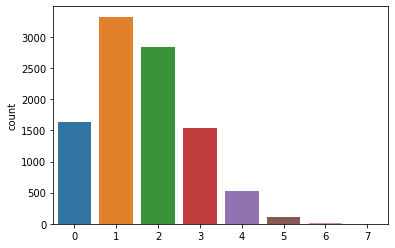

In [ ]:
sns.countplot(x)
plt.show()

In [ ]:
# 누적분포함수
x = np.arange(11)
rv.cdf(x)

array([0.16150558, 0.48451675, 0.7752268 , 0.93027216, 0.98453803,
       0.99756184, 0.99973248, 0.99998055, 0.99999916, 0.99999998,
       1.        ])

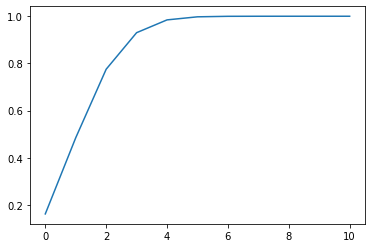

In [ ]:
plt.plot(x, rv.cdf(x))
plt.show()

In [ ]:
# 주사위를 10번 던졌을 때 1이 3번이하 나올 확률

prob = rv.cdf(x)
prob[3]

0.9302721574455114

In [ ]:
# 포아송분포
rv = poisson(2)

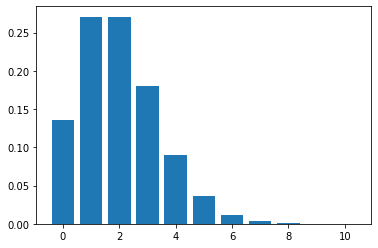

In [ ]:
x = np.arange(11)
plt.bar(x, rv.pmf(x))
plt.show()

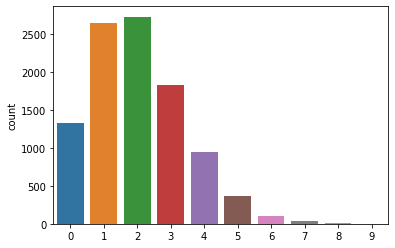

In [ ]:
x = rv.rvs(10000)
sns.countplot(x)
plt.show()

In [ ]:
x.mean()

2.022

In [ ]:
from scipy.stats import norm

In [ ]:
rv = norm( loc=0, scale=1 )

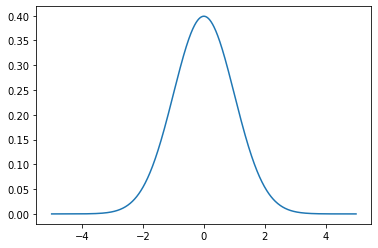

In [ ]:
x = np.linspace(-5, 5 ,1000)
plt.plot(x, rv.pdf(x))
plt.show()

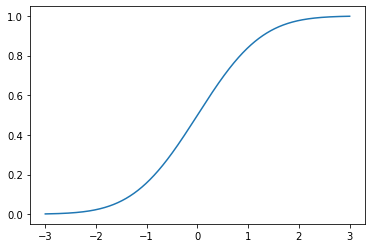

In [ ]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, rv.cdf(x))
plt.show()

## 중심극한의 정리

In [ ]:
from scipy.stats import uniform

In [ ]:
n = 20
m = 100000
mean = []

rv = uniform(n)
for _ in range(m):
  x = rv.rvs(n)
  mean.append(x.mean())

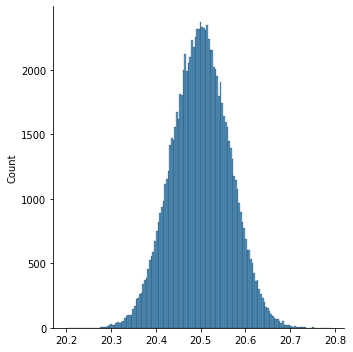

In [ ]:
sns.displot(mean)

In [ ]:
# 초기자금이 10,000원이고
# 49%의 확률로 100원을 따거나, 51%의 확률로 100원을 잃는 베르누이 분포를 가정
# 도박사는 얼마만에 파산할 것인가?(파산하지 않는 경우는 고려하지 않는가?)

n = 10000
p = 0.49
r = []
x = [-100, 100]

while True:
  i = bernoulli(p).rvs(1)[0]
  n += x[i]
  r.append(n)
  if n < 0: break

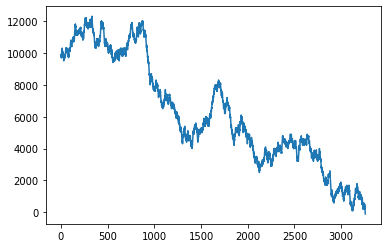

In [ ]:
plt.plot(r)
plt.show()

이때, 도박사가 파산할 때 까지의 게임의 횟수를 m이라고 한다면 
- 이때, m이 확률변수가 됩니다.
- 평균적으로 몇회만에 파산하는지를 확인하고 싶다면
- 충분히 시뮬레이션을 해보고 그 결과를 확인
  - 수업 시간에는 많이 해볼수는 없고
  - 1000회 정도의 몬테카를로 시뮬레이션을 진행
  - 시간이 꽤 걸립니다.

In [ ]:
p = 0.49
m = []
x = [-100, 100]

for _ in range(1000):
  n = 10000
  cnt = 0
  while True:
    cnt += 1
    i = bernoulli(p).rvs(1)[0]
    n += x[i]
    if n < 0: break
  m.append(cnt)

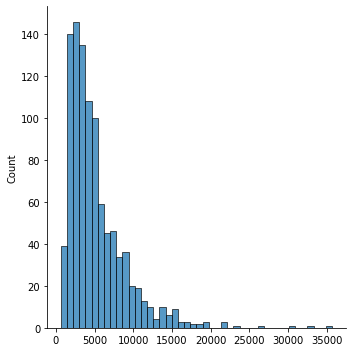

In [ ]:
sns.displot(m)
plt.show()

In [ ]:
print( np.mean(m) )
print( np.var(m) )
print( np.std(m) )

5214.264
15313513.490304
3913.2484575227268
